### Question 2: Part 8.2

Based on the condition given by question 8.2, we know that: 

    s(0)=10,e(0)=1,c(0)=0,p(0)=0

And the rate constant k1, k2, k3 µm/min is given by the question:

    k1=100,k2=600,k3=150

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Initial
c0 = 0      # From question 8.2
p0 = 0      # From question 8.2
e0 = 1      # initial concentration of E: 1 μm
s0 = 10     # initial concentration of S: 10 μm

# rate µm/min
k1 = 100    
k2 = 600    
k3 = 150

Km = (k2+k3)/k1      # Formula get from question 8.1

In [2]:
# Init arrays
h = 0.001       # set to 0.001
t = np.linspace(0, 0.5, 501)   # time: set to 0-0.5 min
s = np.zeros(501)
s[0] = s0

In [3]:
# X indicates t, Y indicates s

In [4]:
# Define the function(the right side of equation(10))

# X indicates t, Y indicates s

def function(X,Y):
    f = -1*(k3*e0*Y)/(Y+Km)
    return f

According to the formula on research of Illinois Institute of Technology:

http://www.math.iit.edu/~fass/478578_Chapter_3.pdf

In [5]:
# Use fourth-order Runge-Kutta method to compute s

for i in range(0, 500):
    k_1 = function(t[i], s[i])
    k_2 = function(t[i]+0.5*h, s[i]+0.5*k_1*h)
    k_3 = function(t[i]+0.5*h, s[i]+0.5*k_2*h)
    k_4 = function(t[i]+h, s[i]+k_3*h)
    s[i+1] = s[i]+h*(k_1+2*k_2+2*k_3+k_4)/6

In [6]:
# Compute c by equation(9)

c = np.zeros(501)
for i in range(1, 501):
    c[i] = (e0*s[i])/(s[i]+Km)

In [7]:
# Compute e by equation(6)

e = np.zeros(501)
for i in range(0, 501):
    e[i] = e0-c[i]

In [8]:
# Compute V by equation(5) and use integral to compute p

V = np.zeros(501)
for i in range(0, 501):
    V[i] = k3*c[i]
    
p = np.zeros(501)
for i in range(0, 501):
    p[i] = k3*sum(c[0:i])*h

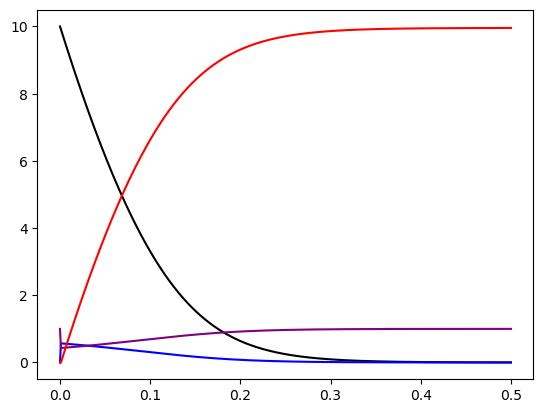

In [9]:
# Plot mass of species as a function time in a picture

plt.figure()
plt.plot(t,s,color='black')
plt.plot(t,c,color='blue')
plt.plot(t,e,color='purple')
plt.plot(t,p,color='red')
plt.show()

Reference

Illinois Institute of Technology. 3 Runge-Kutta Methods, Illinois Institute of Technology, 20 Feb. 2007, http://math.iit.edu/~fass/478578_Chapter_3.pdf.

### Question 2: Part 8.3

According to the question, velocity V is the rate of change of the product P.

So we get:

V =  dp/dt  = k3*c

In [12]:
V = np.zeros(501)
for i in range(0, 501):
    V[i] = k3*c[i]

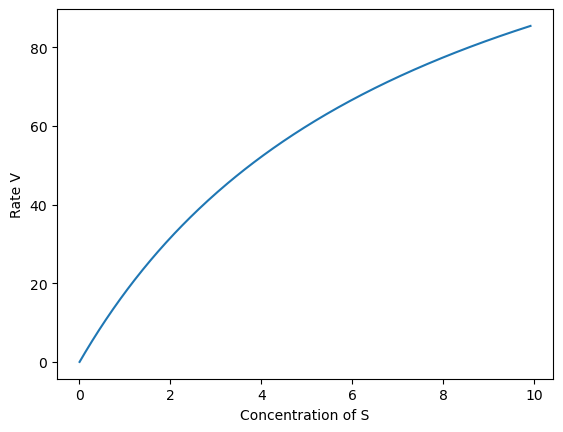

In [13]:
plt.figure()
plt.xlabel("Concentration of S")
plt.ylabel("Rate V")
plt.plot(s[1:500],V[1:500])
plt.show()

From the graph, we can observe that when the concentrations of S are small, the velocity V increases approximately linearly. Especially when concentration of S is less than 0.5.

From the trend of the data line, we can see that velocity V saturates to a maximum value Vm around 90µM/min.